<a href="https://colab.research.google.com/github/RuthStowers/MAT422/blob/main/Homework_1.4_Principal_Component_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1.4.1 **Singular Value Decompostion**

In linear algebra, the singular value decomposition (SVD) is a factorization of a real or complex matrix. An example is below.

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from matplotlib import pyplot as plt
from sklearn.decomposition import TruncatedSVD
float_formatter = lambda x: "%.2f" % x
np.set_printoptions(formatter={'float_kind':float_formatter})
from sklearn.ensemble import RandomForestClassifier

In [3]:
X, y = load_digits(return_X_y=True)

The dataset contains 1797 8x8 images. If you specify return_X_y=True the function will return the pixels as a one dimensional array.

In [4]:
X.shape

(1797, 64)

In [5]:
y

array([0, 1, 2, ..., 8, 9, 8])

Let’s take a look at the first digit. As we can see, it’s simply an array of length 64 containing the pixel intensities.

In [6]:
image = X[0]

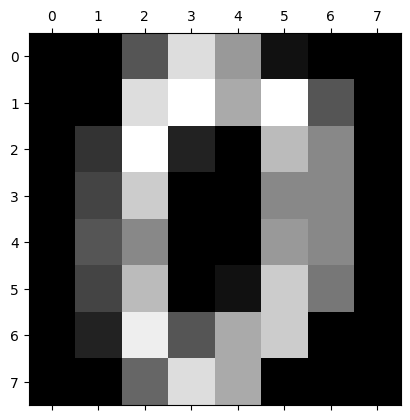

In [8]:
image = image.reshape((8, 8))
plt.matshow(image, cmap = 'gray')

Next, we’ll use Singular Value Decomposition to see whether we are able to reconstruct the image using only 2 features for each row. The s matrix returned by the function must be converted into a diagonal matrix using the diag method. By default, diag will create a matrix that is n x n, relative to the original matrix. This causes a problem as the size of the matrices no longer follow the rule of matrix multiplication where the number of columns in a matrix must match the number of rows in the other matrix. Therefore, we create a new m x n matrix and populate the first n x n part of it with the diagonal matrix.

In [9]:
U, s, V = np.linalg.svd(image)
S = np.zeros((image.shape[0], image.shape[1]))
S[:image.shape[0], :image.shape[0]] = np.diag(s)
n_component = 2
S = S[:, :n_component]
V = V[:n_component, :]
A = U.dot(S.dot(V))
print(A)

[[0.00 -1.10 4.74 12.16 9.52 2.44 -1.33 0.00]
 [0.00 1.81 15.31 13.79 11.23 12.27 4.48 0.00]
 [0.00 3.86 13.36 1.19 1.49 12.59 7.65 0.00]
 [0.00 3.39 10.76 -0.35 0.20 10.36 6.61 0.00]
 [0.00 3.11 9.52 -0.85 -0.24 9.26 6.04 0.00]
 [0.00 3.61 11.79 0.12 0.60 11.27 7.07 0.00]
 [0.00 2.08 12.63 8.58 7.13 10.60 4.66 0.00]
 [0.00 -1.18 4.88 12.71 9.96 2.47 -1.44 0.00]]


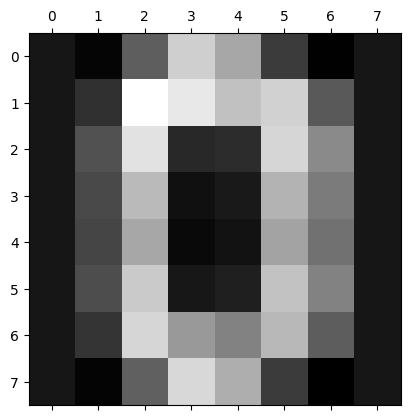

In [10]:
plt.matshow(A, cmap = 'gray')

We can get the reduced feature space by taking the dot product of the U and S matrices.

In [11]:
U.dot(S)

array([[10.97, -12.23],
       [26.04, -6.82],
       [18.73, 7.95],
       [14.60, 8.08],
       [12.72, 7.84],
       [16.19, 8.21],
       [20.45, -2.05],
       [11.36, -12.85]])

#1.4.3 **Principal Component Analysis**

Principal component analysis, or PCA, is a dimensionality reduction method that is often used to reduce the dimensionality of large data sets, by transforming a large set of variables into a smaller one that still contains most of the information in the large set. We see an example below.

In [12]:
import pandas as pd
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
# load dataset into Pandas DataFrame
df = pd.read_csv(url, names=['sepal length','sepal width','petal length','petal width','target'])
from sklearn.preprocessing import StandardScaler
features = ['sepal length', 'sepal width', 'petal length', 'petal width']
# Separating out the features
x = df.loc[:, features].values
# Separating out the target
y = df.loc[:,['target']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

In [13]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(x)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [14]:
finalDf = pd.concat([principalDf, df[['target']]], axis = 1)

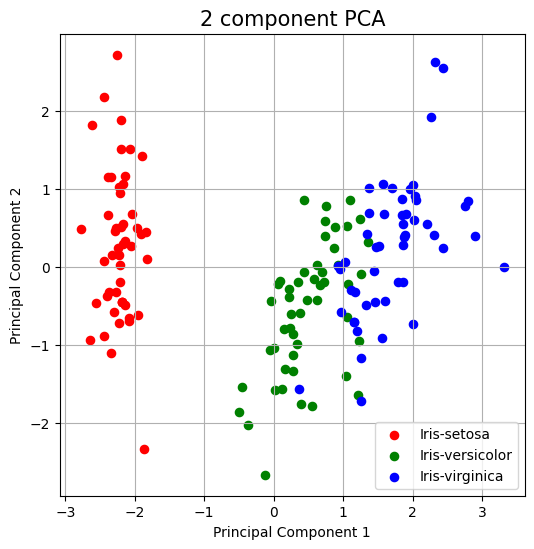

In [17]:
fig = plt.figure(figsize = (6,6))
ax = fig.add_subplot(1,1,1)
ax.set_xlabel('Principal Component 1', fontsize = 10)
ax.set_ylabel('Principal Component 2', fontsize = 10)
ax.set_title('2 component PCA', fontsize = 15)
targets = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['target'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 35)
ax.legend(targets)
ax.grid()